In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models, Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import wget

# Tensors

#### 1- Math Operations

In [6]:
a = tf.constant([1, 2, 3], dtype=tf.float32)
b = tf.constant([4, 5, 6], dtype=tf.float32)

add = tf.add(a, b)
subtract = tf.subtract(a, b)
multiply = tf.multiply(a, b)
divide = tf.divide(a, b)

print("Add:", add)
print("Subtract:", subtract)
print("Multiply:", multiply)
print("Divide:", divide)

# Broadcasting
c = tf.constant([1, 2, 3], dtype=tf.float32)
d = tf.constant(2.0, dtype=tf.float32)
broadcast_mul = tf.multiply(c, d)
print("Broadcasting Multiplication:", broadcast_mul)

Add: tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)
Subtract: tf.Tensor([-3. -3. -3.], shape=(3,), dtype=float32)
Multiply: tf.Tensor([ 4. 10. 18.], shape=(3,), dtype=float32)
Divide: tf.Tensor([0.25 0.4  0.5 ], shape=(3,), dtype=float32)
Broadcasting Multiplication: tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32)


#### 2- Matrix Operations

In [3]:
matrix1 = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
matrix2 = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)

matmul = tf.matmul(matrix1, matrix2)
transpose = tf.transpose(matrix1)
inverse = tf.linalg.inv(matrix1)  # Only if the matrix is invertible

print("Matrix Multiplication:\n", matmul)
print("Transpose:\n", transpose)
print("Inverse:\n", inverse)

Matrix Multiplication:
 tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
Transpose:
 tf.Tensor(
[[1. 3.]
 [2. 4.]], shape=(2, 2), dtype=float32)
Inverse:
 tf.Tensor(
[[-2.0000002   1.0000001 ]
 [ 1.5000001  -0.50000006]], shape=(2, 2), dtype=float32)


#### 3- Reduction Operations

In [4]:
c = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)

sum_c = tf.reduce_sum(c)
mean_c = tf.reduce_mean(c)
max_c = tf.reduce_max(c)

print("Sum:", sum_c)
print("Mean:", mean_c)
print("Max:", max_c)

Sum: tf.Tensor(15.0, shape=(), dtype=float32)
Mean: tf.Tensor(3.0, shape=(), dtype=float32)
Max: tf.Tensor(5.0, shape=(), dtype=float32)


#### 4- Reshaping Operations

In [5]:
tensor = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.float32)

reshaped_tensor = tf.reshape(tensor, [3, 2])
expanded_tensor = tf.expand_dims(tensor, axis=0)
squeezed_tensor = tf.squeeze(expanded_tensor)

print("Original Tensor:\n", tensor)
print("Reshaped Tensor:\n", reshaped_tensor)
print("Expanded Tensor:\n", expanded_tensor)
print("Squeezed Tensor:\n", squeezed_tensor)

Original Tensor:
 tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
Reshaped Tensor:
 tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float32)
Expanded Tensor:
 tf.Tensor(
[[[1. 2. 3.]
  [4. 5. 6.]]], shape=(1, 2, 3), dtype=float32)
Squeezed Tensor:
 tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


# Linear Regression

In [20]:
# Generate synthetic data
X = np.array([1, 2, 3, 4, 5], dtype=np.float32)
Y = np.array([5, 8, 11, 14, 17], dtype=np.float32) # y = 3x + 2

# Define a simple linear regression model
class LinearRegressionModel(tf.Module):
    def __init__(self):
        self.w = tf.Variable(0.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b

# Instantiate the model
model = LinearRegressionModel()

# Define a loss function (mean squared error)
def loss_fn(model, X, Y):
    Y_pred = model(X)
    return tf.reduce_mean(tf.square(Y_pred - Y))

# Define a training loop
learning_rate = 0.08
for epoch in range(200):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, X, Y)
    gradients = tape.gradient(loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * gradients[0])
    model.b.assign_sub(learning_rate * gradients[1])
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy()}")

# Print final parameters
print(f"w: {model.w.numpy()}, b: {model.b.numpy()}")

# print a prediction for x=10
print(f"for x = {10}, y = {model(10)}")

Epoch 0: Loss = 139.0
Epoch 20: Loss = 1.5695239305496216
Epoch 40: Loss = 0.040093645453453064
Epoch 60: Loss = 0.008164739236235619
Epoch 80: Loss = 0.002670117886736989
Epoch 100: Loss = 0.0008910238975659013
Epoch 120: Loss = 0.0002975333190988749
Epoch 140: Loss = 9.935537673300132e-05
Epoch 160: Loss = 3.317815571790561e-05
Epoch 180: Loss = 1.1078501302108634e-05
w: 3.001248598098755, b: 1.9954913854599
for x = 10, y = 32.00797653198242


# Logistic Regression

In [21]:
# Generate synthetic data
X = np.array([1, 2, 3, 4, 5], dtype=np.float32)
Y = np.array([0, 0, 1, 1, 1], dtype=np.float32)

# Define a simple logistic regression model
class LogisticRegressionModel(tf.Module):
    def __init__(self):
        self.w = tf.Variable(0.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return tf.sigmoid(self.w * x + self.b)

# Instantiate the model
model = LogisticRegressionModel()

# Define a loss function (binary cross-entropy)
def loss_fn(model, X, Y):
    Y_pred = model(X)
    return tf.reduce_mean(tf.losses.binary_crossentropy(Y, Y_pred))

# Define a training loop
learning_rate = 0.1
for epoch in range(100):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, X, Y)
    gradients = tape.gradient(loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * gradients[0])
    model.b.assign_sub(learning_rate * gradients[1])
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy()}")

# Print final parameters
print(f"w: {model.w.numpy()}, b: {model.b.numpy()}")

# print a prediction for x=10
print(f"for x = {10}, y = {model(10)}")

Epoch 0: Loss = 0.6931469440460205
Epoch 10: Loss = 0.5268524289131165
Epoch 20: Loss = 0.5054933428764343
Epoch 30: Loss = 0.48650693893432617
Epoch 40: Loss = 0.46882128715515137
Epoch 50: Loss = 0.45232662558555603
Epoch 60: Loss = 0.4369344711303711
Epoch 70: Loss = 0.42256125807762146
Epoch 80: Loss = 0.4091280996799469
Epoch 90: Loss = 0.39656171202659607
w: 0.722234845161438, b: -1.1127417087554932
for x = 10, y = 0.9977834820747375


# neural networks

In [7]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 226ms/step - loss: 30.4013
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 24.2329
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 19.3735
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 15.5440
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 12.5249
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 10.1436
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 8.2641
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 6.7796
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 5.6060
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 4.6770
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 3.9407
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 3.3560
Epoch 13/500
1/1 [==============================] - 0

In [8]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 246ms/step
[[18.978983]]


# Fashion MNIST

The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [28]:
fmnsit = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fmnsit.load_data()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

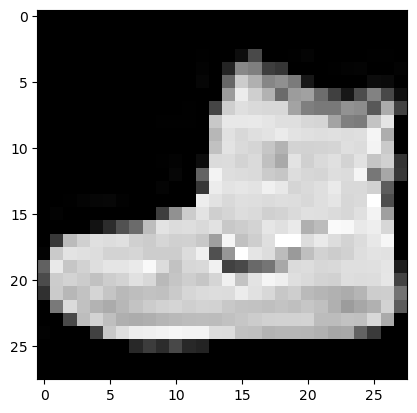

In [6]:
index = 0    # 0 to 59999
# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {y_train[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {X_train[index]}')

# Visualize the image
plt.imshow(X_train[index], cmap='gray')

In [29]:
# Normalize the pixel values of the train and test images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [32]:
# Build the classification model
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(units=10, activation = tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=5)

#model.save('model.h5')
#model = tf.keras.models.load_model('model.h5')

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4959 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3738 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3360 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3123 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2954 - accuracy: 0.8909


In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3567 - accuracy: 0.8756


[0.35673853754997253, 0.8755999803543091]

# Callbacks

#### 1- Custom Callback

In [2]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('loss') < 0.4 or logs.get('accuracy') > 0.9:
            print("\nDone Training!")
            self.model.stop_training = True

In [5]:
callback = Callback()

(X_train, y_train), (X_test, y_test) = fmnsit.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(units=10, activation = tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5014 - accuracy: 0.8240
Epoch 2/10
1854/1875 [============================>.] - ETA: 0s - loss: 0.3760 - accuracy: 0.8640
Done Training!
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3764 - accuracy: 0.8637


#### 2- Reduces The Learning Rate Callback 

In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduces the learning rate when a monitored metric has stopped improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',         # Metric to monitor
    factor=0.1,                 # Factor by which the learning rate will be reduced
    patience=10,                # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.0001,              # Lower bound on the learning rate
    verbose=1
)

#### 3- Early Stopping Callback

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

# Create the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='accuracy',    # Metric to be monitored
    min_delta=0.05,       # Minimum change to qualify as an improvement
    patience=5,            # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode
    mode='max',            # Mode: 'max' for metrics to be maximized, 'min' for metrics to be minimized
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Fit the model with the callback
model.fit(
    X_train, y_train,
    epochs=100,
    callbacks=[early_stopping, ReduceLROnPlateau]
)


Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1622 - accuracy: 0.9389
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1595 - accuracy: 0.9402
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1553 - accuracy: 0.9412
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1509 - accuracy: 0.9440
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1487 - accuracy: 0.9435
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1453 - accuracy: 0.9450
Epoch 6: early stopping


#### 4- TensorBoard callback

In [11]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(
    log_dir='./logs',           # Directory where logs will be saved
    histogram_freq=1,           # Frequency (in epochs) at which to compute activation and weight histograms
    write_graph=True,           # Whether to visualize the graph in TensorBoard
    write_images=True,          # Whether to write model weights to visualize as images in TensorBoard
    update_freq='epoch',        # Frequency of writing metrics to TensorBoard
    profile_batch=2             # Profile the batch(es) to compute execution time; set to 0 or None to disable
)

model.fit(X_train, y_train, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1578 - accuracy: 0.9411
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1556 - accuracy: 0.9412
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1517 - accuracy: 0.9435
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1479 - accuracy: 0.9444
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1433 - accuracy: 0.9456


In [13]:
# After training, launch TensorBoard from the command line: tensorboard --logdir=tensorflow_tut/logs
# This will start a local server. You can then open a web browser and go to http://localhost:6006 to view the TensorBoard dashboard.

# Convolutional Neural Networks (CNNs)

#### 1- Build The Model

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 flatten_8 (Flatten)         (None, 7744)             

#### 2- Compile and Train the model

In [37]:
# Expand dimensions to match the input shape of the model
#X_train = X_train[..., tf.newaxis]
#X_test = X_test[..., tf.newaxis]

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# categorical_crossentropy for one-hot encoded labels np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
# sparse_categorical_crossentropy for integer labels  np.array([0, 1, 2])
# binary_crossentropy for two labels

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1351 - accuracy: 0.9492 - val_loss: 0.2620 - val_accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1131 - accuracy: 0.9573 - val_loss: 0.2794 - val_accuracy: 0.9180
Epoch 3/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0955 - accuracy: 0.9643 - val_loss: 0.2763 - val_accuracy: 0.9186
Epoch 4/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0796 - accuracy: 0.9709 - val_loss: 0.3287 - val_accuracy: 0.9173
Epoch 5/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0703 - accuracy: 0.9735 - val_loss: 0.3458 - val_accuracy: 0.9154


#### 3- Plot The Training And Validation Accuracy And Loss

Text(0.5, 1.0, 'Training and validation loss')

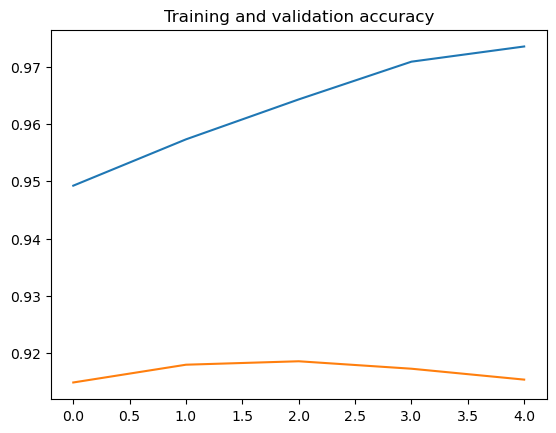

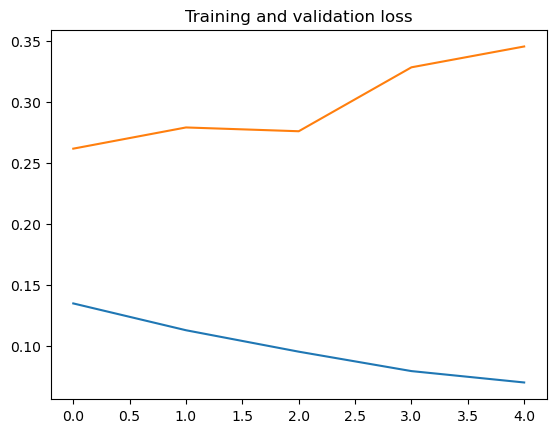

In [38]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

#### 4- Visualize The Outputs Of Each Layer

1/1 [==============================] - 0s 173ms/step


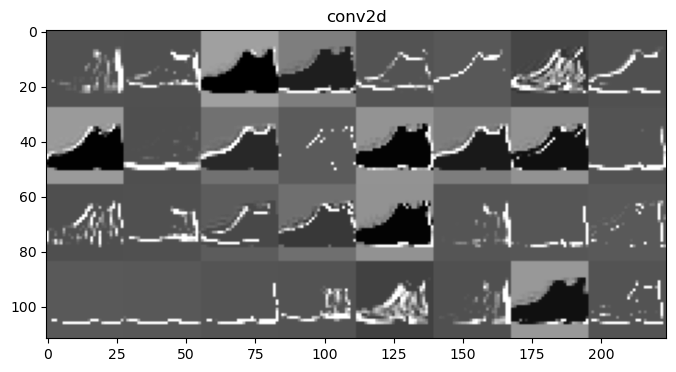

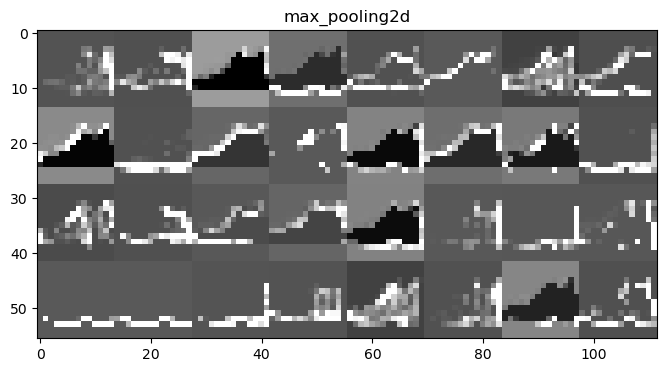

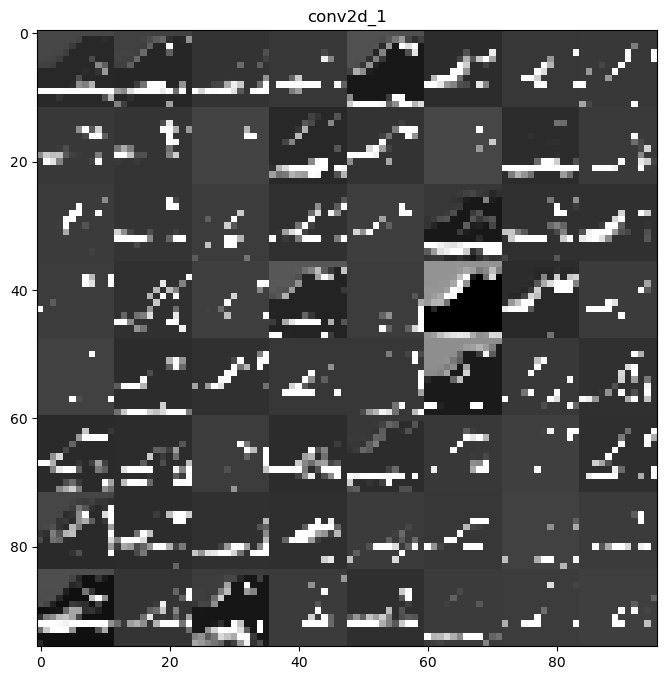

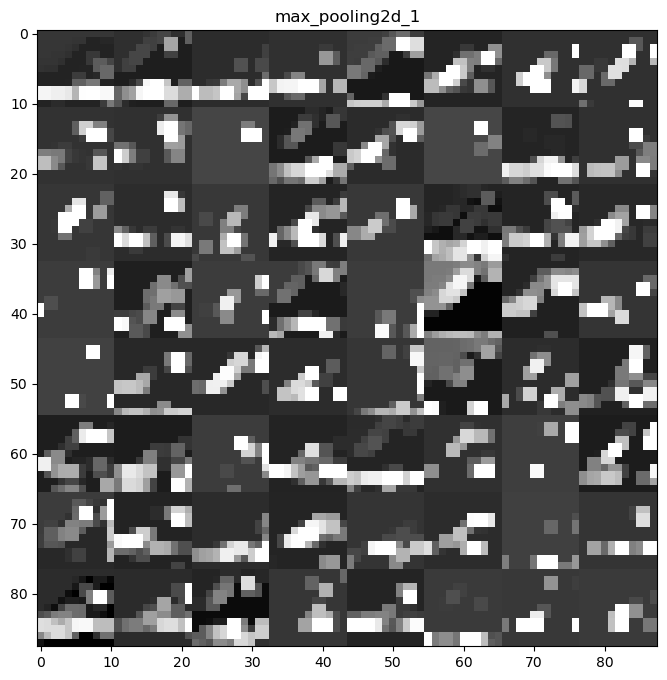

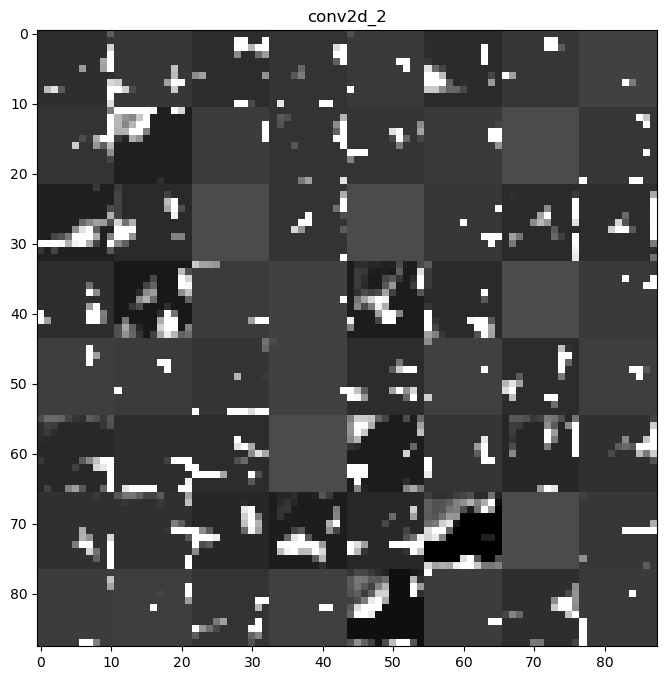

In [23]:
# Function to visualize the outputs of each layer
def visualize_feature_maps(activation_model, input_image):
    activations = activation_model.predict(input_image)
    layer_names = [layer.name for layer in activation_model.layers if 'conv' in layer.name or 'max_pooling' in layer.name]

    for layer_name, activation in zip(layer_names, activations):
        num_filters = activation.shape[-1]
        size = activation.shape[1]
        n_cols = 8
        n_rows = num_filters // n_cols
        display_grid = np.zeros((size * n_rows, n_cols * size))

        for i in range(n_rows):
            for j in range(n_cols):
                filter_img = activation[0, :, :, i * n_cols + j]
                filter_img -= filter_img.mean()
                if filter_img.std() != 0:
                    filter_img /= filter_img.std()
                filter_img *= 64
                filter_img += 128
                filter_img = np.clip(filter_img, 0, 255).astype('uint8')
                display_grid[i * size: (i + 1) * size, j * size: (j + 1) * size] = filter_img

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Prepare a single input image for visualization
input_image = X_test[:1]

# List of layer names to visualize
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name or 'max_pooling' in layer.name]

# Visualize the outputs
visualize_layer_outputs(model, layer_names, input_image)
plt.show()


# Image Data Generator

#### 1- Download The Training And Validation Sets

In [29]:
import os
import zipfile
import wget

# Download the training set
train_zip_url = 'https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip'
train_zip_path = 'horse-or-human.zip'
wget.download(train_zip_url, train_zip_path)

# Download the validation set
validation_zip_url = 'https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip'
validation_zip_path = 'validation-horse-or-human.zip'
wget.download(validation_zip_url, validation_zip_path)

# Unzip training set
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall('horse-or-human')

# Unzip validation set
with zipfile.ZipFile(validation_zip_path, 'r') as zip_ref:
    zip_ref.extractall('validation-horse-or-human')


In [2]:
# Directory with training horse pictures
train_horse_dir = os.path.join('horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('validation-horse-or-human/humans')

In [17]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

TRAIN SET HORSES: ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
TRAIN SET HUMANS: ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
VAL SET HORSES: ['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
VAL SET HUMANS: ['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']
total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


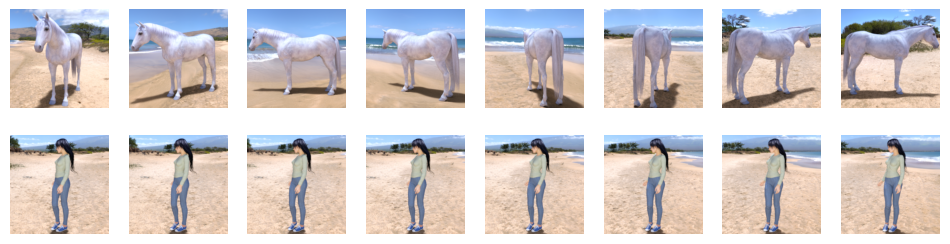

In [36]:
#display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 8

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 1.5, nrows * 1.5)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#### 2- Image Manipulation And Data generation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255.0,           # Rescaling the pixel values
#    rotation_range=40,           # Randomly rotate images in the range (degrees, 0 to 180)
#    width_shift_range=0.2,       # Randomly translate images horizontally (fraction of total width)
#    height_shift_range=0.2,      # Randomly translate images vertically (fraction of total height)
#    shear_range=0.2,             # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
#    zoom_range=0.2,              # Randomly zoom images
#    horizontal_flip=True,        # Randomly flip images horizontally
#    fill_mode='nearest'          # Points outside the boundaries are filled according to the given mode
)

# Flow training images in batches of 128 using train_datagen generator
train_generator = datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


#### 3- Build, Compile And Train The Model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 25s 3s/step - loss: 0.6871 - accuracy: 0.5729 - val_loss: 0.5821 - val_accuracy: 0.8672
Epoch 2/15
8/8 [==============================] - 26s 3s/step - loss: 0.4047 - accuracy: 0.8965 - val_loss: 0.7447 - val_accuracy: 0.8750
Epoch 3/15
8/8 [==============================] - 26s 3s/step - loss: 0.1681 - accuracy: 0.9365 - val_loss: 1.5161 - val_accuracy: 0.8438
Epoch 4/15
8/8 [==============================] - 24s 3s/step - loss: 0.3567 - accuracy: 0.8754 - val_loss: 1.0550 - val_accuracy: 0.7852
Epoch 5/15
8/8 [==============================] - 24s 3s/step - loss: 0.2022 - accuracy: 0.9155 - val_loss: 1.5861 - val_accuracy: 0.8008
Epoch 6/15
8/8 [==============================] - 24s 3s/step - loss: 0.1137 - accuracy: 0.9555 - val_loss: 2.6745 - val_accuracy: 0.7812
Epoch 7/15
8/8 [==============================] - 24s 3s/step - loss: 0.0924 - accuracy: 0.9622 - val_loss: 2.6609 - val_accuracy: 0.7773
Epoch 8/15
8/8 [==================

#### 4- Test The Model

1/1 [==============================] - 0s 141ms/step
[6.067346e-15]


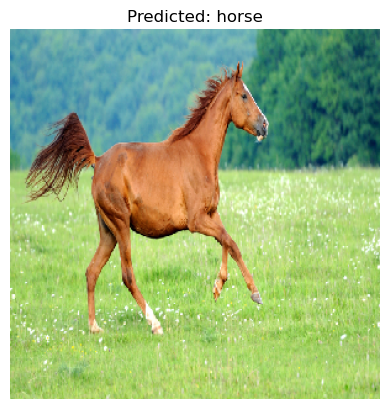

In [15]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Class names for CIFAR-10 dataset
class_names = ['horse', 'human']

# Ask the user to upload an image
root = Tk()
#root.withdraw()  # Hide the root window
initial_dir = os.getcwd()
filename = askopenfilename(initialdir=initial_dir, title='Select an image file', filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
root.destroy()  # Close the Tkinter window

# Load and preprocess the image
img = image.load_img(filename, target_size=(300, 300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Predict the class of the image
predictions = model.predict(img_array)

classes = model.predict(img_array)
print(classes[0])
if classes[0]>0.5:
    plt.title('Predicted: human')
else:
    plt.title('Predicted: horse')
    
# Display the image and the classification result
plt.imshow(img)
plt.axis('off')
plt.show()

#### 5- Visualize the Feature Map

1/1 [==============================] - 0s 209ms/step


C:\Users\DELL G3\AppData\Local\Temp\ipykernel_12792\846085612.py:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\DELL G3\AppData\Local\Temp\ipykernel_12792\846085612.py:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


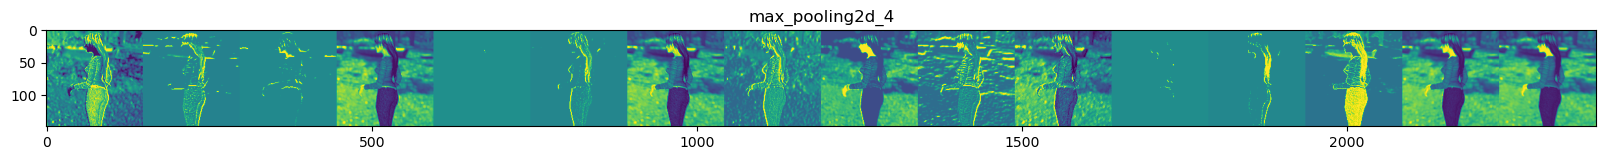

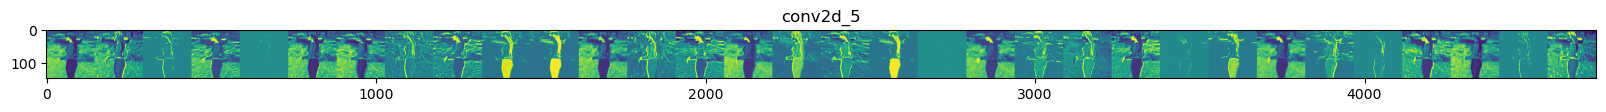

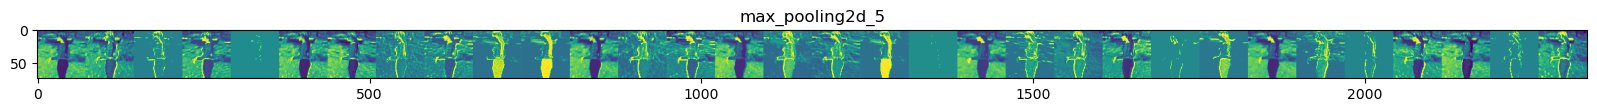

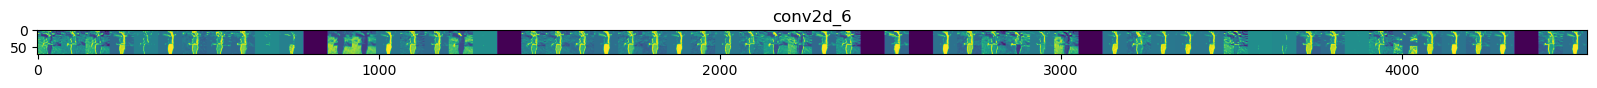

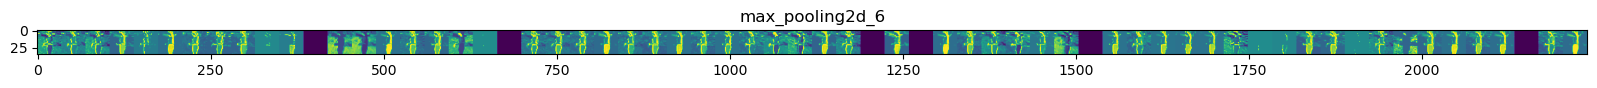

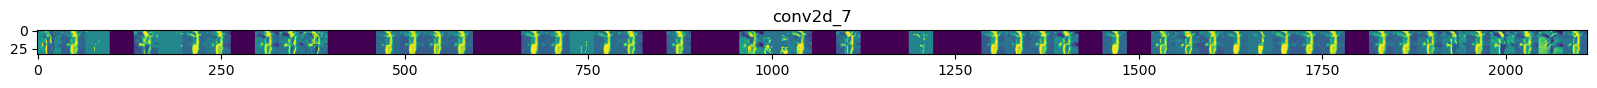

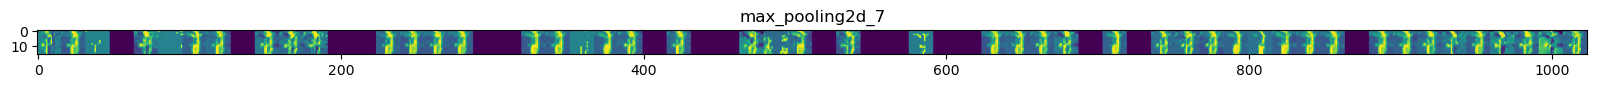

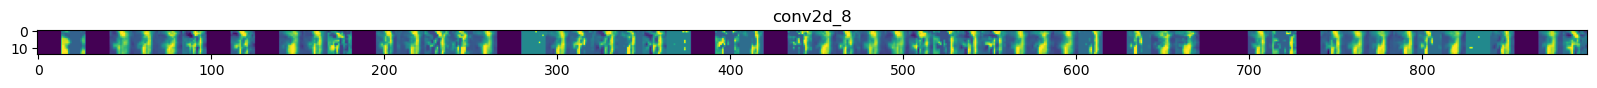

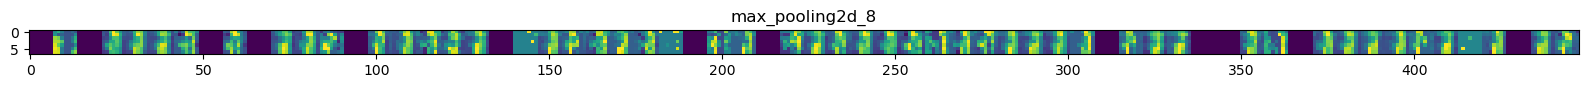

In [18]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Transfer Learning

#### 1- Download The Weights For The inceptionv3 Model

In [42]:
url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
local_weights_file = 'models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

wget.download(url, local_weights_file)

'models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

#### 2- Build The inception_v3 Model, Load And Freeze The Weights

In [44]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Initialize the base model
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), 
                                include_top=False, 
                                weights=None)

# Load the pre-trained weights
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

#pre_trained_model.summary()

#### 3- Build And Compile The New Model

In [45]:
# Choose `mixed7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [50]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Set the training parameters
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

#### 4- Download The Dataset, Manipulate And Generate The Data

In [52]:
url = 'https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip'
wget.download(url)

'cats_and_dogs_filtered.zip'

In [53]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') 

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') 

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### 5- Train The Model

In [54]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 91s - loss: 0.6432 - accuracy: 0.8425 - val_loss: 0.1158 - val_accuracy: 0.9520 - 91s/epoch - 906ms/step
Epoch 2/20
100/100 - 58s - loss: 0.1778 - accuracy: 0.9245 - val_loss: 0.0968 - val_accuracy: 0.9660 - 58s/epoch - 582ms/step
Epoch 3/20
100/100 - 59s - loss: 0.2023 - accuracy: 0.9295 - val_loss: 0.1213 - val_accuracy: 0.9540 - 59s/epoch - 589ms/step
Epoch 4/20
100/100 - 59s - loss: 0.1746 - accuracy: 0.9315 - val_loss: 0.1058 - val_accuracy: 0.9630 - 59s/epoch - 589ms/step
Epoch 5/20
100/100 - 60s - loss: 0.1778 - accuracy: 0.9180 - val_loss: 0.0898 - val_accuracy: 0.9610 - 60s/epoch - 596ms/step
Epoch 6/20
100/100 - 61s - loss: 0.1532 - accuracy: 0.9370 - val_loss: 0.0961 - val_accuracy: 0.9650 - 61s/epoch - 605ms/step
Epoch 7/20
100/100 - 58s - loss: 0.1328 - accuracy: 0.9505 - val_loss: 0.0812 - val_accuracy: 0.9650 - 58s/epoch - 578ms/step
Epoch 8/20
100/100 - 54s - loss: 0.1364 - accuracy: 0.9420 - val_loss: 0.1021 - val_accuracy: 0.9530 - 54s/epoch - 545

#### 6- Plot The Training And Validation Accuracy

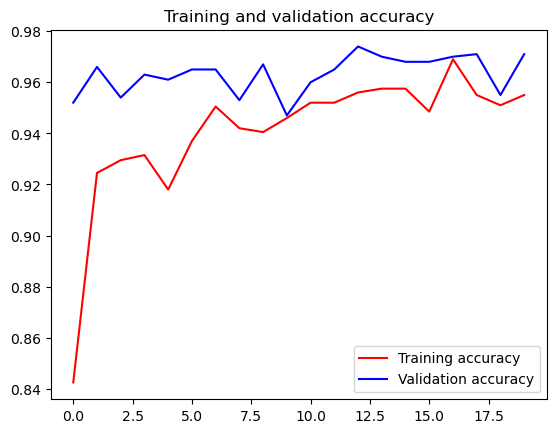

<Figure size 640x480 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()